<a href="https://colab.research.google.com/github/sushrut88/Machine-Learning-Lab/blob/main/practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<ipython-input-6-3aa711543ed2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())


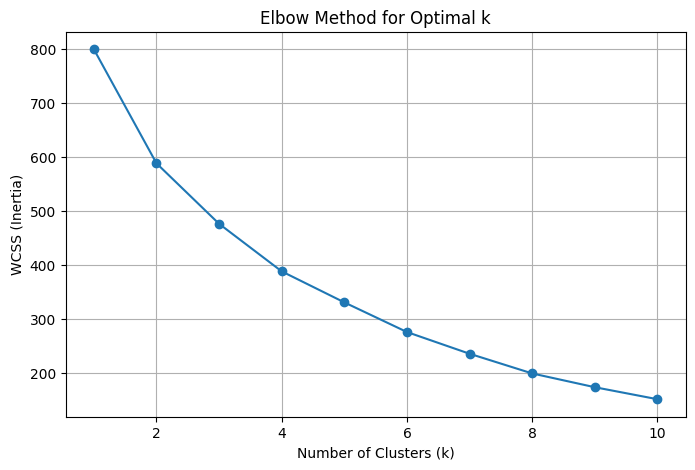

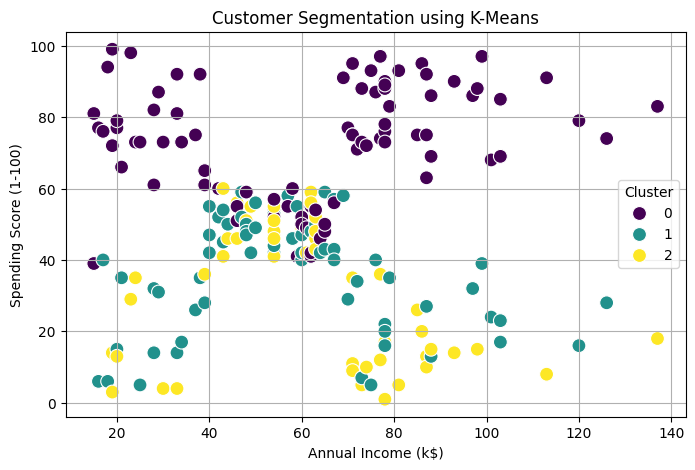

Cluster Centers:
          Age  Annual Income (k$)  Spending Score (1-100)   Gender_Male
0  28.047059           61.788235               72.882353  4.588235e-01
1  45.075758           57.727273               36.181818 -4.996004e-16
2  49.204082           62.244898               29.734694  1.000000e+00


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/Mall_Customers.csv")

print(df.head())

features = ["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]
# Handle missing values for numerical features only
numerical_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
# Or if you want to fill NaNs with 0
# X[numerical_features] = X[numerical_features].fillna(0)

# Convert 'Gender' to numerical representation using one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster center

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

# Choose the optimal k (based on the Elbow Method) and fit K-Means
optimal_k = 3  # Adjust based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters (Using First Two Features: Annual Income vs. Spending Score)
plt.figure(figsize=(8, 5))
# Use the correct column name "Annual Income (k$)"
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.xlabel("Annual Income (k$)")  # Update x-axis label
plt.ylabel("Spending Score (1-100)")  # Update y-axis label
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Get the original feature names after one-hot encoding
feature_names = list(X.columns)

print("Cluster Centers:\n", pd.DataFrame(cluster_centers, columns=feature_names)) # Update with feature_names

<ipython-input-10-c914f090d800>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())


K-Means Silhouette Score: 0.331
DBSCAN Silhouette Score: 0.279


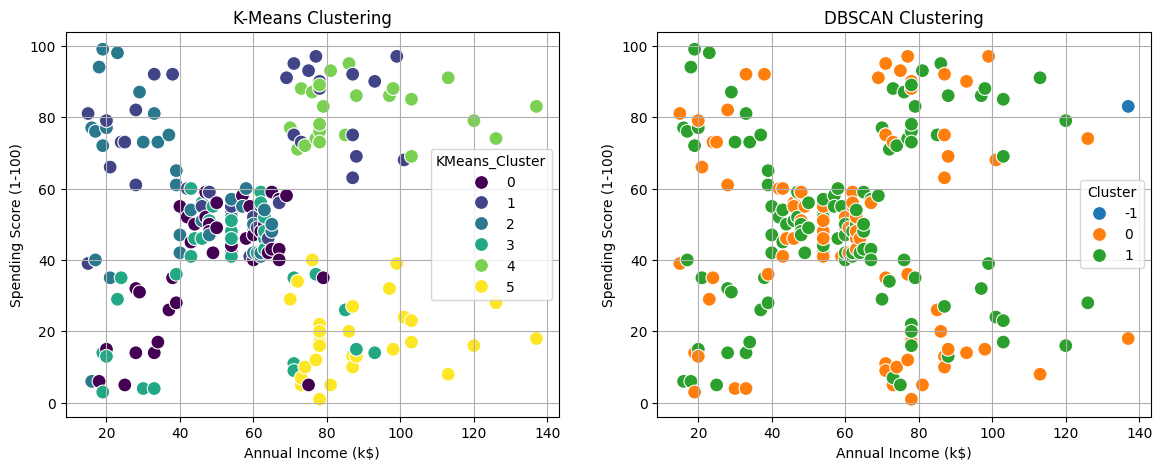

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("/content/Mall_Customers.csv")

features = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

numerical_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, df["KMeans_Cluster"])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

dbscan = DBSCAN(eps=1.2, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

dbscan_labels = df[df["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]
dbscan_silhouette = silhouette_score(X_scaled[df["DBSCAN_Cluster"] != -1], dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["KMeans_Cluster"], palette="viridis", ax=ax[0], s=100)
ax[0].set_title("K-Means Clustering")
ax[0].set_xlabel("Annual Income (k$)")
ax[0].set_ylabel("Spending Score (1-100)")
ax[0].grid()

sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["DBSCAN_Cluster"], palette="tab10", ax=ax[1], s=100)
ax[1].set_title("DBSCAN Clustering")
ax[1].set_xlabel("Annual Income (k$)")
ax[1].set_ylabel("Spending Score (1-100)")
ax[1].grid()

plt.legend(title="Cluster")
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score: {sil_score:.3f}")


k=2, Silhouette Score: 0.252
k=3, Silhouette Score: 0.260
k=4, Silhouette Score: 0.298
k=5, Silhouette Score: 0.304
k=6, Silhouette Score: 0.331
